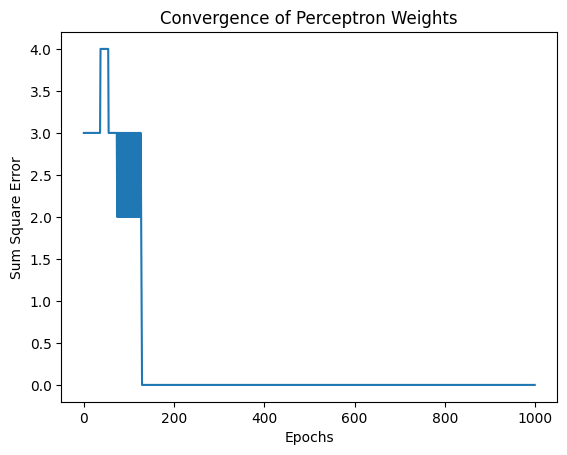

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights and learning rate
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Input data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target output for AND gate
y = np.array([0, 0, 0, 1])

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Calculate weighted sum
def calculate_weighted_sum(x):
    return W0 + W1 * x[0] + W2 * x[1]

# Update weights using perceptron learning rule
def update_weights(y_true, y_pred, x):
    global W0, W1, W2
    error = y_true - y_pred
    W0 += learning_rate * error
    W1 += learning_rate * error * x[0]
    W2 += learning_rate * error * x[1]

# Training the perceptron
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x_i = X[i]
        y_pred = step_function(calculate_weighted_sum(x_i))
        update_weights(y[i], y_pred, x_i)
        total_error += (y[i] - y_pred) ** 2
    errors.append(total_error)

# Plotting the epochs against the error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Convergence of Perceptron Weights')
plt.show()


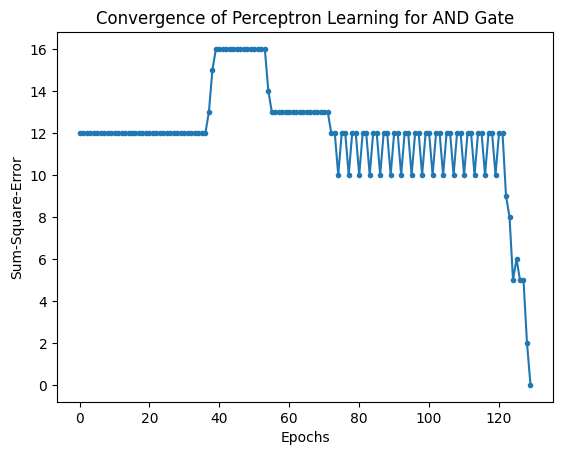

Converged Weights: W0=-0.10000000000000765, W1=0.1000000000000001, W2=0.05000000000000032


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to implement Step activation
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to calculate sum-square-error
def calculate_error(targets, predictions):
    return np.sum((targets - predictions) ** 2)

# Initialize weights and learning rate
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Training data for AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Lists to store error values and epochs
errors = []
epochs = 0

# Training loop
while True:
    total_error = 0
    for i in range(len(inputs)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * inputs[i, 0] + W2 * inputs[i, 1]
        
        # Make a prediction using step activation
        prediction = step_activation(weighted_sum)
        
        # Update weights using the perceptron learning rule
        W0 += learning_rate * (targets[i] - prediction)
        W1 += learning_rate * (targets[i] - prediction) * inputs[i, 0]
        W2 += learning_rate * (targets[i] - prediction) * inputs[i, 1]
        
        # Calculate and accumulate the error
        total_error += calculate_error(targets, np.array([step_activation(W0 + W1 * x[0] + W2 * x[1]) for x in inputs]))
    
    # Append the total error to the list
    errors.append(total_error)
    
    # Check for convergence
    if total_error <= 0.002:
        break
    
    # Check for maximum iterations
    if epochs >= 1000:
        break
    
    # Increment the epoch count
    epochs += 1

# Plotting the epochs against error values
plt.plot(range(epochs + 1), errors, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Convergence of Perceptron Learning for AND Gate')
plt.show()

# Print the converged weights
print(f"Converged Weights: W0={W0}, W1={W1}, W2={W2}")


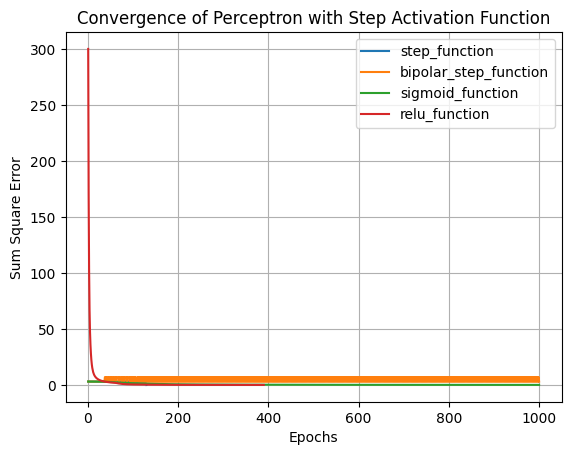

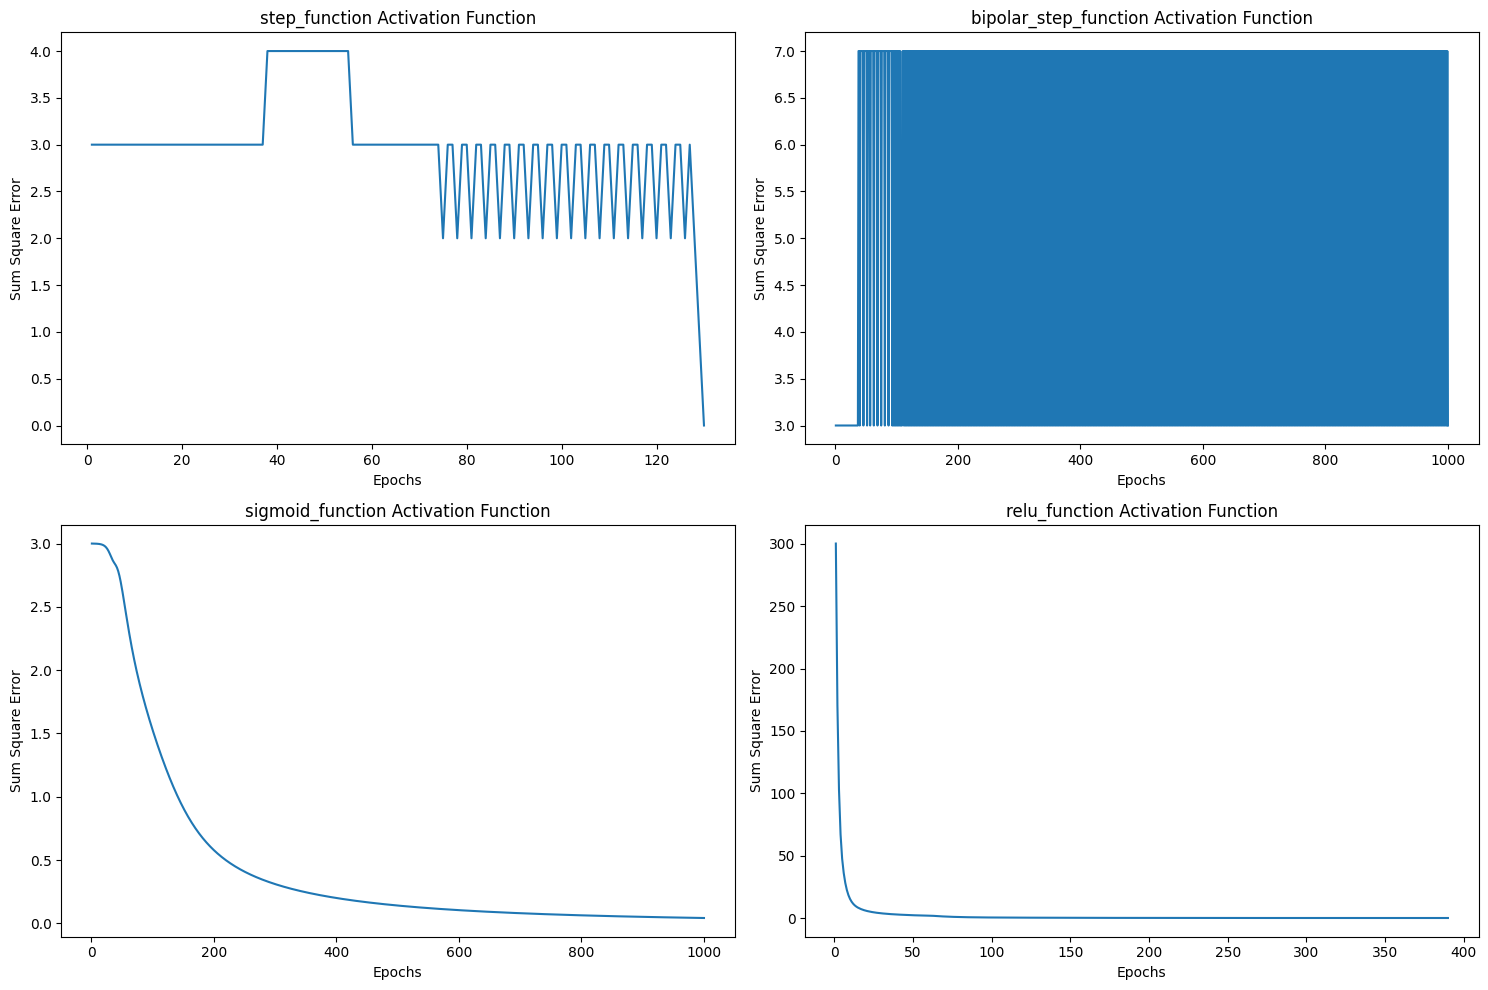

In [10]:
# Define initial weights and learning rate
W = np.array([10, 0.2, -0.75])

# AND gate inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 0, 0, 1])

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Bi-Polar Step function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu_function(x):
    return max(0, x)

# Training the perceptron
def train_perceptron(inputs, outputs, activation_function):
    global W  # Declare W as a global variable to access and modify it within the function
    epochs = 0
    errors = []

    while True:
        total_error = 0
        for i in range(len(inputs)):
            input_vector = np.insert(inputs[i], 0, 1)  # Adding bias term
            net = np.dot(W, input_vector)
            output = activation_function(net)
            error = outputs[i] - output
            total_error += error**2
            W += learning_rate * error * input_vector

        errors.append(total_error)
        epochs += 1

        if total_error <= 0.002 or epochs >= 1000:
            break

    return epochs, errors

# Train and plot for each activation function
activation_functions = [step_function, bipolar_step_function, sigmoid_function, relu_function]

for activation_function in activation_functions:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each activation function
    epochs, errors = train_perceptron(inputs, outputs, activation_function)
    plt.plot(range(1, epochs + 1), errors, label=activation_function.__name__)

plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.legend()
plt.title('Convergence of Perceptron with Step Activation Function')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))

for i, activation_function in enumerate(activation_functions, 1):
    W = np.array([10, 0.2, -0.75])  # Reset weights for each activation function
    epochs, errors = train_perceptron(inputs, outputs, activation_function)
    plt.subplot(2, 2, i)
    plt.plot(range(1, epochs + 1), errors)
    plt.title(f'{activation_function.__name__} Activation Function')
    plt.xlabel('Epochs')
    plt.ylabel('Sum Square Error')

plt.tight_layout()
plt.show()


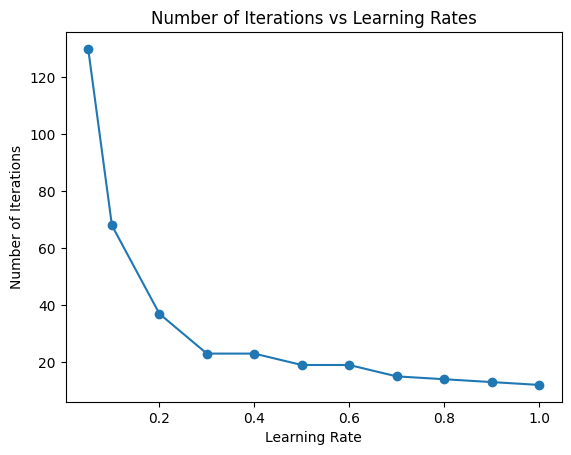

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W = np.array([10, 0.2, -0.75])

# AND gate inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 0, 0, 1])

# Learning rates to experiment with
learning_rates = [0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron with varying learning rates
def train_perceptron(inputs, outputs, learning_rate):
    global W
    epochs = 0
    total_error = float('inf')

    while total_error > 0.002 and epochs < 1000:
        total_error = 0
        for i in range(len(inputs)):
            input_vector = np.insert(inputs[i], 0, 1)  # Adding bias term
            net = np.dot(W, input_vector)
            output = step_function(net)
            error = outputs[i] - output
            total_error += error**2
            W += learning_rate * error * input_vector

        epochs += 1

    return epochs

# Collecting the number of iterations for each learning rate
iterations_list = []

for lr in learning_rates:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each learning rate
    iterations = train_perceptron(inputs, outputs, lr)
    iterations_list.append(iterations)

# Plotting the results
plt.plot(learning_rates, iterations_list, marker='o')
plt.title('Number of Iterations vs Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.show()


In [36]:
# Define a function to predict the output for unknown inputs
def predict(input_data):
    input_vector = np.insert(input_data, 0, 1)  # Add bias term
    net = np.dot(W, input_vector)
    output = step_function(net)
    return output

# Example usage:
unknown_input = np.array([1, 0])  # Define your unknown input here
prediction = predict(unknown_input)
print("Prediction for input {}: {}".format(unknown_input, prediction))


Prediction for input [1 0]: 0


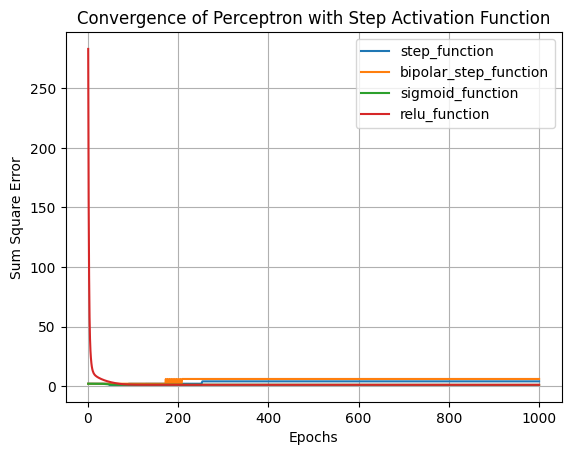

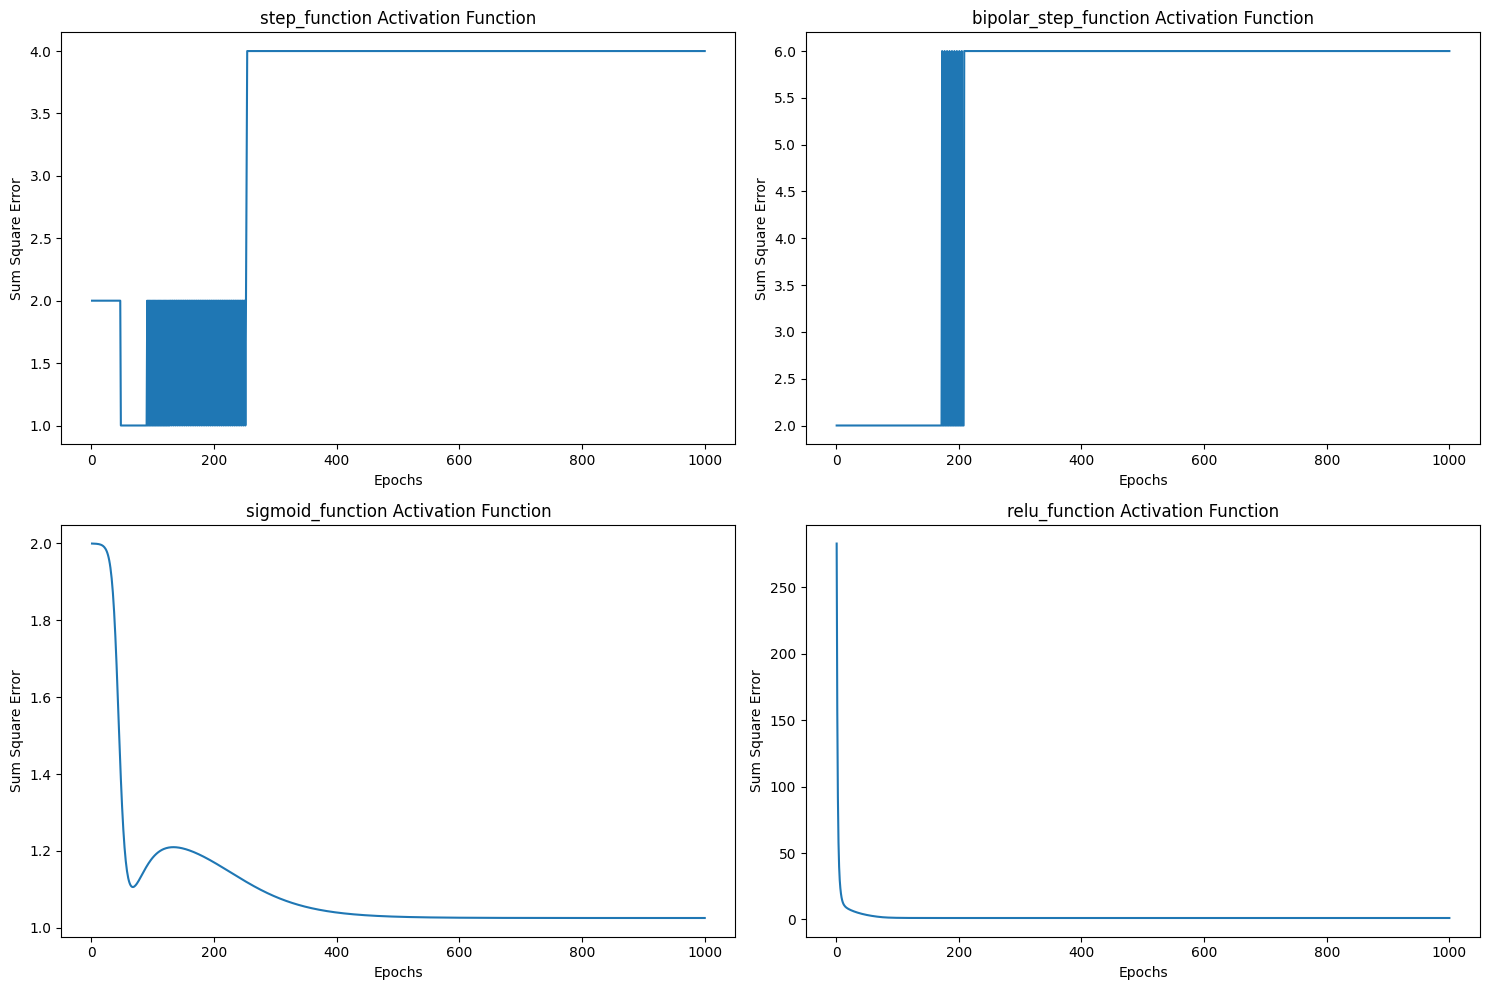

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialisation
learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

# Activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def bipolar_step_function(x):
    return np.where(x >= 0, 1, -1)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return np.maximum(0, x)

# Training function
def train_perceptron(X, y, W0, W1, W2, activation_func):
    error_values = []
    for epoch in range(epochs):
        error = 0
        for i in range(len(X)):
            # Forward pass
            net_input = W0 + W1 * X[i, 0] + W2 * X[i, 1]
            output = activation_func(net_input)

            # Error calculation
            error += (y[i] - output) ** 2

            # Weight update
            W0 += learning_rate * (y[i] - output)
            W1 += learning_rate * (y[i] - output) * X[i, 0]
            W2 += learning_rate * (y[i] - output) * X[i, 1]

        error_values.append(error)

        # Convergence check
        if error <= convergence_error:
            break

    return epochs, error_values

activation_functions = [step_function, bipolar_step_function, sigmoid_function, relu_function]

for activation_function in activation_functions:
    W0, W1, W2 = 10, 0.2, -0.75  # Reset weights for each activation function
    epochs, errors = train_perceptron(X,y,W0,W1,W2, activation_function)
    plt.plot(range(1, epochs + 1), errors, label=activation_function.__name__)

plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.legend()
plt.title('Convergence of Perceptron with Step Activation Function')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))

for i, activation_function in enumerate(activation_functions, 1):
    W0, W1, W2 = 10, 0.2, -0.75  # Reset weights for each activation function
    epochs,errors = train_perceptron(X,y,W0,W1,W2, activation_function)
    plt.subplot(2, 2, i)
    plt.plot(range(1, epochs + 1), errors)
    plt.title(f'{activation_function.__name__} Activation Function')
    plt.xlabel('Epochs')
    plt.ylabel('Sum Square Error')

plt.tight_layout()
plt.show()


In [70]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def train_perceptron(X, y, epochs=1000, learning_rate=0.01):
    # Add a bias column to the input data
    X = np.c_[np.ones(X.shape[0]), X]

    # Initialize random weights
    weights = np.random.rand(X.shape[1])

    for epoch in range(epochs):
        # Calculate predictions
        predictions = predict(X, weights)

        # Calculate the error
        error = y - predictions

        # Update weights using gradient descent
        weights += learning_rate * np.dot(X.T, error * predictions * (1 - predictions))

    return weights

# Given dataset
data = np.array([
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0]
])

# Split into features and labels
X = data[:, :-1]
y = data[:, -1]

# Train the perceptron
trained_weights = train_perceptron(X, y)

# Test the trained perceptron on a new data point
new_data_point = np.array([20, 6, 2, 386])
new_data_point = np.insert(new_data_point, 0, 1)  # Add bias
prediction = predict(new_data_point, trained_weights)

# Classify based on the threshold (0.5)
classification = 1 if prediction >= 0.5 else 0

print(f"Prediction: {prediction}, Classified as: {'High' if classification == 1 else 'Low'}")




Prediction: 1.0, Classified as: High


In [77]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def train_perceptron_pseudo_inverse(X, y):
    # Add a bias column to the input data
    X = np.c_[np.ones(X.shape[0]), X]

    # Calculate pseudo-inverse weights using the formula
    weights = np.linalg.pinv(X.T @ X) @ X.T @ y

    return weights

# Given dataset
data = np.array([
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0]
])

# Split into features and labels
X = data[:, :-1]
y = data[:, -1]

# Train the perceptron using pseudo-inverse
pseudo_inverse_weights = train_perceptron_pseudo_inverse(X, y)

# Test the pseudo-inverse trained perceptron on a new data point
new_data_point = np.array([19, 1, 2, 120])
new_data_point = np.insert(new_data_point, 0, 1)  # Add bias
prediction_pseudo_inverse = predict(new_data_point, pseudo_inverse_weights)

# Classify based on the threshold (0.5)
classification_pseudo_inverse = 1 if prediction_pseudo_inverse >= 0.6 else 0

print(f"Pseudo-inverse Prediction: {prediction_pseudo_inverse}, Classified as: {'High' if classification_pseudo_inverse == 1 else 'Low'}")


Pseudo-inverse Prediction: 0.5122162444549911, Classified as: Low


In [79]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [0], [0], [1]])

# Neural Network architecture
input_layer_neurons = 2
hidden1_layer_neurons = 4
hidden2_layer_neurons = 2
output_layer_neurons = 1

# Initializing weights and biases
np.random.seed(42)
weights_input_hidden1 = np.random.uniform(size=(input_layer_neurons, hidden1_layer_neurons))
biases_hidden1 = np.zeros((1, hidden1_layer_neurons))

weights_hidden1_hidden2 = np.random.uniform(size=(hidden1_layer_neurons, hidden2_layer_neurons))
biases_hidden2 = np.zeros((1, hidden2_layer_neurons))

weights_hidden2_output = np.random.uniform(size=(hidden2_layer_neurons, output_layer_neurons))
biases_output = np.zeros((1, output_layer_neurons))

# Training parameters
learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden1_input = np.dot(inputs, weights_input_hidden1) + biases_hidden1
    hidden1_output = sigmoid(hidden1_input)

    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + biases_hidden2
    hidden2_output = sigmoid(hidden2_input)

    output_layer_input = np.dot(hidden2_output, weights_hidden2_output) + biases_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = outputs - predicted_output

    # Backpropagation
    output_error = error * sigmoid_derivative(predicted_output)
    hidden2_error = output_error.dot(weights_hidden2_output.T) * sigmoid_derivative(hidden2_output)
    hidden1_error = hidden2_error.dot(weights_hidden1_hidden2.T) * sigmoid_derivative(hidden1_output)

    # Update weights and biases
    weights_hidden2_output += hidden2_output.T.dot(output_error) * learning_rate
    biases_output += np.sum(output_error, axis=0, keepdims=True) * learning_rate

    weights_hidden1_hidden2 += hidden1_output.T.dot(hidden2_error) * learning_rate
    biases_hidden2 += np.sum(hidden2_error, axis=0, keepdims=True) * learning_rate

    weights_input_hidden1 += inputs.T.dot(hidden1_error) * learning_rate
    biases_hidden1 += np.sum(hidden1_error, axis=0, keepdims=True) * learning_rate

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error:
        print(f"Converged at epoch {epoch + 1}. Error: {np.mean(np.abs(error))}")
        break

# Test the trained model
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = sigmoid(sigmoid(sigmoid(test_input.dot(weights_input_hidden1) + biases_hidden1)
                              .dot(weights_hidden1_hidden2) + biases_hidden2)
                     .dot(weights_hidden2_output) + biases_output)

print("\nTest Output:")
print(test_output.round())



Test Output:
[[0.]
 [0.]
 [0.]
 [0.]]


In [87]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the input features and corresponding target values for AND gate
and_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_y = np.array([0, 0, 0, 1])

# Define the input features and corresponding target values for XOR gate
xor_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = np.array([0, 1, 1, 0])

# Create an MLP classifier for AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000, random_state=42)

# Train the AND gate classifier
and_classifier.fit(and_X, and_y)

# Create an MLP classifier for XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', max_iter=1000, random_state=42)

# Train the XOR gate classifier
xor_classifier.fit(xor_X, xor_y)

# Test the classifiers
and_predictions = and_classifier.predict(and_X)
xor_predictions = xor_classifier.predict(xor_X)

# Print the results
print("AND Gate Predictions:", and_predictions)
print("XOR Gate Predictions:", xor_predictions)


C:\Users\dhede\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND Gate Predictions: [0 0 0 1]
XOR Gate Predictions: [0 1 1 0]


C:\Users\dhede\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
